#  Laboratorio 5 - Python
## @author: Roberto Mendoza 

- <a href='#1.0'> 1.0 Merge dataset  </a> 
- <a href='#1.1'> 1.1 Dummies  </a> 
- <a href='#2.0'> 2.0 Merge ENAHO  </a> 
- <a href='#2.1'> 2.1 Etiquetas ENAHO  </a> 
- <a href='#2.2'> 2.2 Dummies por nivel educativo  </a> 
- <a href='#2.3'> 2.3 Trabajo infantil y adolescente  </a>  
- <a href='#2.4'> 2.4 Append  </a> 
- <a href='#3.0'> 3.0 ENDES  </a> 
- <a href='#3.1'> 3.1 Dummies por nivel de anemia  </a>
- <a href='#3.2'> 3.2 Salud Mental  </a>
- <a href='#3.3'> 3.3 Violencia doméstica </a>


In [2]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns # seaborn es una librearia de gráficos 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D

warnings.filterwarnings('ignore') 


In [67]:
# algunos puntos iumportanes 

# Uso de copy para limpiar una base de datos. La base de datos original puede alterarse luego de los cambios.
# Esto no es bueno si queremos la base original para realizar nuevas bases de datos. 

df = pd.DataFrame({'team': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                   'points': [18, 22, 19, 14, 14, 11, 20, 28],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4]})

df

,team,points,assists
0,A,18,5
1,B,22,7
2,C,19,7
3,D,14,9
4,E,14,12
5,F,11,9
6,G,20,9
7,H,28,4


In [68]:
df_subset = df[0:4]

df_subset.team[0] = 'X'
df_subset

,team,points,assists
0,X,18,5
1,B,22,7
2,C,19,7
3,D,14,9


In [69]:
df

,team,points,assists
0,X,18,5
1,B,22,7
2,C,19,7
3,D,14,9
4,E,14,12
5,F,11,9
6,G,20,9
7,H,28,4


In [70]:
df = pd.DataFrame({'team': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                   'points': [18, 22, 19, 14, 14, 11, 20, 28],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4]})

df_subset = df[0:4].copy()

df_subset.team[0] = 'X'
df_subset

,team,points,assists
0,X,18,5
1,B,22,7
2,C,19,7
3,D,14,9


In [71]:
df

,team,points,assists
0,A,18,5
1,B,22,7
2,C,19,7
3,D,14,9
4,E,14,12
5,F,11,9
6,G,20,9
7,H,28,4


## <a id='1.0'> 1.0 Merge dataset </a> 

In [72]:

df1 = pd.DataFrame(
    {
    'id':[1,2,3,4,5],
    'color': ["red", "blue", "green", np.nan, "red"],
    'size' : ["small", "large", "medium", "medium", "small"],
    'type' : ["A", "B", "C", np.nan, "A"]
    }
)

df1

,id,color,size,type
0,1,red,small,A
1,2,blue,large,B
2,3,green,medium,C
3,4,NaN,medium,NaN
4,5,red,small,A


In [73]:
df2 = pd.DataFrame(
    {
    'id':[2,3,4,10,20,30],
    'value': [1000, 2000, 3000,4000,5000,6000]
    }
)
df2

,id,value
0,2,1000
1,3,2000
2,4,3000
3,10,4000
4,20,5000
5,30,6000


In [74]:
# merge datasets

# Se une las dos bases de datos asi no todos los identificadores coincidan 

pd.merge(df1, df2, how = "outer", on = "id")
pd.merge(df1, df2, how = "outer", on = "id", validate = "1:1")

,id,color,size,type,value
0,1,red,small,A,NaN
1,2,blue,large,B,1000.0
2,3,green,medium,C,2000.0
3,4,NaN,medium,NaN,3000.0
4,5,red,small,A,NaN
5,10,NaN,NaN,NaN,4000.0
6,20,NaN,NaN,NaN,5000.0
7,30,NaN,NaN,NaN,6000.0


In [75]:
# Merge completo 

pd.merge(df1, df2, how = "inner", on = "id", validate = "1:1")


,id,color,size,type,value
0,2,blue,large,B,1000
1,3,green,medium,C,2000
2,4,NaN,medium,NaN,3000


In [76]:
# Merge dado un Master Data

pd.merge(df1, df2, how = "left", on = "id", validate = "1:1")


,id,color,size,type,value
0,1,red,small,A,NaN
1,2,blue,large,B,1000.0
2,3,green,medium,C,2000.0
3,4,NaN,medium,NaN,3000.0
4,5,red,small,A,NaN


## <a id='1.1'> 1.1 Dummies </a> 

In [77]:
# Creación de dummies 
data = pd.merge(df1, df2, how = "outer", on = "id", validate = "1:1")
data['dummy'] = np.where(data.value > 1500,1,0)  # no toma en cuenta los missing 
data

,id,color,size,type,value,dummy
0,1,red,small,A,NaN,0
1,2,blue,large,B,1000.0,0
2,3,green,medium,C,2000.0,1
3,4,NaN,medium,NaN,3000.0,1
4,5,red,small,A,NaN,0
5,10,NaN,NaN,NaN,4000.0,1
6,20,NaN,NaN,NaN,5000.0,1
7,30,NaN,NaN,NaN,6000.0,1


In [78]:
# Si alguna de las variables del condicional es missing, entonces la variable dummy tambien  

data['dummy'].mask(
    data[['value']].isnull().any(axis=1), np.nan, inplace=True)

In [79]:
data

,id,color,size,type,value,dummy
0,1,red,small,A,NaN,NaN
1,2,blue,large,B,1000.0,0.0
2,3,green,medium,C,2000.0,1.0
3,4,NaN,medium,NaN,3000.0,1.0
4,5,red,small,A,NaN,NaN
5,10,NaN,NaN,NaN,4000.0,1.0
6,20,NaN,NaN,NaN,5000.0,1.0
7,30,NaN,NaN,NaN,6000.0,1.0


## <a id='2.0'> 2.0 Merge ENAHO </a> 

In [3]:
data1 = pd.read_stata("../../data/enaho/enaho01-2019-100.dta")
enaho100_19 = data1.copy()
enaho100_19

,conglome,vivienda,hogar,ubigeo2,dominio,p102,p103,p103a,p110,p111a,p112a,nbi1,nbi2,nbi3,nbi4,nbi5,latitud,longitud,altitud
0,005001,007,11,10101,sierra norte,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-6.228422,-77.87709,2348
1,005001,017,11,10101,sierra norte,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso colectivo (para varias vivi...,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-6.228422,-77.87709,2348
2,005001,028,11,10101,sierra norte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.228422,-77.87709,2348
3,005001,040,11,10101,sierra norte,adobe,cemento,"planchas de calamina, fibra de cemento o simil...",otra,otra,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda sin servicios hogienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-6.228422,-77.87709,2348
4,005001,050,11,10101,sierra norte,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso colectivo (para varias vivi...,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-6.228422,-77.87709,2348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43863,011350,022,11,180101,costa sur,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-17.212933,-70.93914,1427
43864,011350,059,11,180101,costa sur,"madera (pona, tornillo, etc)",tierra,"planchas de calamina, fibra de cemento o simil...",pilón o pileta de uso público,otra,con medidor de uso exclusivo para la vivienda,vivienda inadecuada,vivienda sin hacinamiento,hogares con vivienda sin servicios hogienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-17.212933,-70.93914,1427
43865,011350,078,11,180101,costa sur,"madera (pona, tornillo, etc)",cemento,"planchas de calamina, fibra de cemento o simil...",pilón o pileta de uso público,otra,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda sin servicios hogienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-17.212933,-70.93914,1427
43866,011350,097,11,180101,costa sur,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda con hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-17.212933,-70.93914,1427


In [81]:
enaho100_19.sort_values(["conglome","vivienda","hogar"])

,conglome,vivienda,hogar,ubigeo2,dominio,p102,p103,p103a,p110,p111a,p112a,nbi1,nbi2,nbi3,nbi4,nbi5,latitud,longitud,altitud
0,005001,007,11,10101,sierra norte,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-6.228422,-77.87709,2348
1,005001,017,11,10101,sierra norte,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso colectivo (para varias vivi...,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-6.228422,-77.87709,2348
2,005001,028,11,10101,sierra norte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.228422,-77.87709,2348
3,005001,040,11,10101,sierra norte,adobe,cemento,"planchas de calamina, fibra de cemento o simil...",otra,otra,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda sin servicios hogienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-6.228422,-77.87709,2348
4,005001,050,11,10101,sierra norte,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso colectivo (para varias vivi...,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-6.228422,-77.87709,2348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43863,011350,022,11,180101,costa sur,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-17.212933,-70.93914,1427
43864,011350,059,11,180101,costa sur,"madera (pona, tornillo, etc)",tierra,"planchas de calamina, fibra de cemento o simil...",pilón o pileta de uso público,otra,con medidor de uso exclusivo para la vivienda,vivienda inadecuada,vivienda sin hacinamiento,hogares con vivienda sin servicios hogienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-17.212933,-70.93914,1427
43865,011350,078,11,180101,costa sur,"madera (pona, tornillo, etc)",cemento,"planchas de calamina, fibra de cemento o simil...",pilón o pileta de uso público,otra,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda sin hacinamiento,hogares con vivienda sin servicios hogienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-17.212933,-70.93914,1427
43866,011350,097,11,180101,costa sur,adobe,cemento,"planchas de calamina, fibra de cemento o simil...","red pública, dentro de la vivienda",red pública de desagüe dentro de la vivienda,con medidor de uso exclusivo para la vivienda,vivienda adecuada,vivienda con hacinamiento,hogares con vivienda con servicios higienicos,hogares con niños que asisten a la escuela,hogares sin alta dependencia económica,-17.212933,-70.93914,1427


In [6]:
data2 = pd.read_stata("../../data/enaho/enaho01-2019-200.dta",convert_categoricals=False)

# convert_categoricals=False mantener los valores numéricos en las varaibles categóricas

enaho200_19 = data2.copy()

data3 = pd.read_stata("../../data/enaho/enaho01a-2019-300.dta",convert_categoricals=False)
enaho300_19 = data3.copy()

data4 = pd.read_stata("../../data/enaho/enaho01a-2019-400.dta",convert_categoricals=False)
enaho400_19 = data4.copy()

data5 = pd.read_stata("../../data/enaho/enaho01a-2019-500.dta",convert_categoricals=False)
enaho500_19 = data5.copy()

data6 = pd.read_stata("../../data/enaho/sumaria-2018.dta",convert_categoricals=False)
sumaria_18 = data6.copy()

data7 = pd.read_stata("../../data/enaho/sumaria-2019.dta",convert_categoricals=False)
sumaria_19 = data7.copy()

data8 = pd.read_stata("../../data/enaho/sumaria-2020.dta",convert_categoricals=False)
sumaria_20 = data8.copy()

data9 = pd.read_stata("../../data/enaho/deflactores_base2020_new.dta",convert_categoricals=False)
base_deflactores = data9.copy()

data1 = pd.read_stata("../../data/enaho/enaho01-2019-100.dta",convert_categoricals=False)
enaho100_19 = data1.copy()

In [7]:
data1

,conglome,vivienda,hogar,ubigeo2,dominio,p102,p103,p103a,p110,p111a,p112a,nbi1,nbi2,nbi3,nbi4,nbi5,latitud,longitud,altitud
0,005001,007,11,10101,4,3.0,5.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-6.228422,-77.87709,2348
1,005001,017,11,10101,4,3.0,5.0,4.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,-6.228422,-77.87709,2348
2,005001,028,11,10101,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.228422,-77.87709,2348
3,005001,040,11,10101,4,3.0,5.0,4.0,7.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,-6.228422,-77.87709,2348
4,005001,050,11,10101,4,3.0,5.0,4.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,-6.228422,-77.87709,2348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43863,011350,022,11,180101,3,3.0,5.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-17.212933,-70.93914,1427
43864,011350,059,11,180101,3,7.0,6.0,4.0,3.0,7.0,1.0,1.0,0.0,1.0,0.0,0.0,-17.212933,-70.93914,1427
43865,011350,078,11,180101,3,7.0,5.0,4.0,3.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,-17.212933,-70.93914,1427
43866,011350,097,11,180101,3,3.0,5.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-17.212933,-70.93914,1427


## <a id='2.1'> 2.1 Etiquetas ENAHO </a> 

In [8]:
# Lectura de etiqueta con  convert_categoricals=False, iterator=True como argumentos adicionales 

labels100 = pd.read_stata("../../data/enaho/enaho01-2019-100.dta",convert_categoricals=False, iterator=True)
labels200 = pd.read_stata("../../data/enaho/enaho01-2019-200.dta",convert_categoricals=False, iterator=True)
labels300 = pd.read_stata("../../data/enaho/enaho01a-2019-300.dta",convert_categoricals=False, iterator=True)
labels500 = pd.read_stata("../../data/enaho/enaho01a-2019-500.dta",convert_categoricals=False, iterator=True)
labels_sumaria18 = pd.read_stata("../../data/enaho/sumaria-2018.dta",convert_categoricals=False, iterator=True)
labels_sumaria19  = pd.read_stata("../../data/enaho/sumaria-2019.dta",convert_categoricals=False, iterator=True)
labels_sumaria20  = pd.read_stata("../../data/enaho/sumaria-2020.dta",convert_categoricals=False, iterator=True)

#  iterator=True: almacenar las etiquetas

In [11]:
labels100

In [12]:
dir(labels100)  # dir() equivalente attributes()

['DTYPE_MAP',
 'DTYPE_MAP_XML',
 'MISSING_VALUES',
 'NUMPY_TYPE_MAP',
 'OLD_TYPE_MAPPING',
 'RESERVED_WORDS',
 'TYPE_MAP',
 'TYPE_MAP_XML',
 'VALID_RANGE',
 '__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_calcsize',
 '_can_read_value_labels',
 '_chunksize',
 '_column_selector_set',
 '_columns',
 '_convert_categoricals',
 '_convert_dates',
 '_convert_missing',
 '_data_label',
 '_data_read',
 '_decode',
 '_do_convert_categoricals',
 '_do_convert_missing',
 '_do_select_columns',
 '_dtype',
 '_encoding',
 '_get_data_label',
 '_get_dtypes',
 '_get_

In [13]:
labels100.value_labels()  # método (función). Entrega las etiqueta de los valores 

{'dominio': {1: 'costa norte',
  2: 'costa centro',
  3: 'costa sur',
  4: 'sierra norte',
  5: 'sierra centro',
  6: 'sierra sur',
  7: 'selva',
  8: 'lima metropolitana'},
 'p112a': {1: 'con medidor de uso exclusivo para la vivienda',
  2: 'con medidor de uso colectivo (para varias viviendas)',
  3: 'otro'},
 'nbi1': {0: 'vivienda adecuada', 1: 'vivienda inadecuada'},
 'nbi2': {0: 'vivienda sin hacinamiento', 1: 'vivienda con hacinamiento'},
 'nbi3': {0: 'hogares con vivienda con servicios higienicos',
  1: 'hogares con vivienda sin servicios hogienicos'},
 'nbi5': {0: 'hogares sin alta dependencia económica',
  1: 'hogares con alta dependencia económica'},
 'nbi4': {0: 'hogares con niños que asisten a la escuela',
  1: 'hogares con niños que no asisten a la escuela'},
 'p111a': {3: 'letrina (con tratamiento)',
  5: 'pozo ciego o negro',
  7: 'otra',
  9: 'campo abierto o al aire libre',
  1: 'red pública de desagüe dentro de la vivienda',
  2: 'red pública de desagüe fuera de la viv

In [17]:
labels100.varlist # atributo

['conglome',
 'vivienda',
 'hogar',
 'ubigeo2',
 'dominio',
 'p102',
 'p103',
 'p103a',
 'p110',
 'p111a',
 'p112a',
 'nbi1',
 'nbi2',
 'nbi3',
 'nbi4',
 'nbi5',
 'latitud',
 'longitud',
 'altitud']

In [9]:
labels100.variable_labels()

{'conglome': 'número de conglomerado',
 'vivienda': 'número de selección de vivienda',
 'hogar': 'número secuencial del hogar',
 'ubigeo2': 'ubicación geográfica',
 'dominio': 'dominio geográfico',
 'p102': 'el material predominante en las paredes exteriores es:',
 'p103': 'el material predominante en los pisos es:',
 'p103a': 'el material predominante en los techos es:',
 'p110': 'el agua que utilizan en el hogar ¿procede principalmente de:',
 'p111a': 'el baño o servicio higiénico que tiene su hogar esta conectado a:',
 'p112a': 'el servicio eléctrico de su hogar es:',
 'nbi1': 'vivienda inadecuada ( necesidad básica insatisfecha 1 )',
 'nbi2': 'vivienda con hacinamiento ( necesidad básica insatisfecha 2 ) ',
 'nbi3': 'hogares con vivienda sin servicios higiénicos ( necesidad básica insatisfecha 3 ',
 'nbi4': 'hogares con niños que no asisten a la escuela ( necesidad básica insatisfecha 4 ',
 'nbi5': 'hogares con alta dependencia económica ( necesidad básica insatisfecha 5)',
 'latit

In [84]:
print(labels100.variable_labels())  # etiqueta de cada variable

labels100.value_labels().keys()  # etiqueta de cada valor 

{'conglome': 'número de conglomerado', 'vivienda': 'número de selección de vivienda', 'hogar': 'número secuencial del hogar', 'ubigeo2': 'ubicación geográfica', 'dominio': 'dominio geográfico', 'p102': 'el material predominante en las paredes exteriores es:', 'p103': 'el material predominante en los pisos es:', 'p103a': 'el material predominante en los techos es:', 'p110': 'el agua que utilizan en el hogar ¿procede principalmente de:', 'p111a': 'el baño o servicio higiénico que tiene su hogar esta conectado a:', 'p112a': 'el servicio eléctrico de su hogar es:', 'nbi1': 'vivienda inadecuada ( necesidad básica insatisfecha 1 )', 'nbi2': 'vivienda con hacinamiento ( necesidad básica insatisfecha 2 ) ', 'nbi3': 'hogares con vivienda sin servicios higiénicos ( necesidad básica insatisfecha 3 ', 'nbi4': 'hogares con niños que no asisten a la escuela ( necesidad básica insatisfecha 4 ', 'nbi5': 'hogares con alta dependencia económica ( necesidad básica insatisfecha 5)', 'latitud': 'latitud', 

dict_keys(['dominio', 'p112a', 'nbi1', 'nbi2', 'nbi3', 'nbi5', 'nbi4', 'p111a', 'p110', 'p103a', 'p103', 'p102'])

In [18]:
labels100.value_labels()['nbi1']

{0: 'vivienda adecuada', 1: 'vivienda inadecuada'}

In [86]:
# La base master es el módulo 200 de ENAHO

enaho19 = pd.merge(enaho200_19, enaho100_19, how = 'left', on = ["conglome","vivienda","hogar"],
                   validate = "m:1").merge(enaho300_19, how = 'left', on = ["conglome","vivienda","hogar", "codperso"],
                   validate = "1:1").merge(enaho400_19, how = 'left', on = ["conglome","vivienda","hogar", "codperso"],
                   validate = "1:1").merge(enaho500_19, how = 'left', on = ["conglome","vivienda","hogar", "codperso"],
                   validate = "1:1").merge(sumaria_19, how = 'left', on = ["conglome","vivienda","hogar"],
                   validate = "m:1")


In [19]:
enaho19 = pd.merge(enaho200_19, enaho100_19, how = "left", on = ["conglome","vivienda","hogar"], validate = "m:1").\
merge(enaho300_19, how = "left", on = ["conglome", "vivienda", "hogar", "codperso"], validate = "1:1").\
merge(enaho400_19, how = 'left', on = ["conglome","vivienda","hogar", "codperso"],
                   validate = "1:1").merge(enaho500_19, how = 'left', on = ["conglome","vivienda","hogar", "codperso"],
                   validate = "1:1").merge(sumaria_19, how = 'left', on = ["conglome","vivienda","hogar"],
                   validate = "m:1")

# full_join <> outer, inner_join <> inner , left_join <> left

In [20]:
enaho19

,conglome,vivienda,hogar,codperso,p203,p204,p205,p206,p207,p208a,...,año,ubigeo,estrato,mieperho,inghog1d,gashog2d,linpe,linea,pobreza,factor07
0,005009,041,11,01,1,1.0,2.0,NaN,2.0,60.0,...,2019,010101,4,2,27079.218750,22366.013672,171.688263,302.621338,3,94.218208
1,005009,041,11,02,3,1.0,2.0,NaN,2.0,28.0,...,2019,010101,4,2,27079.218750,22366.013672,171.688263,302.621338,3,94.218208
2,005009,056,11,01,1,1.0,2.0,NaN,2.0,48.0,...,2019,010101,4,3,31878.373047,16102.574219,171.688263,302.621338,3,94.218208
3,005009,056,11,02,3,1.0,2.0,NaN,2.0,25.0,...,2019,010101,4,3,31878.373047,16102.574219,171.688263,302.621338,3,94.218208
4,005009,056,11,03,3,1.0,2.0,NaN,2.0,16.0,...,2019,010101,4,3,31878.373047,16102.574219,171.688263,302.621338,3,94.218208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128271,011350,097,11,04,3,1.0,2.0,NaN,2.0,1.0,...,2019,180101,3,5,20722.503906,19194.562500,174.192673,345.210449,2,80.257660
128272,011350,097,11,05,3,1.0,2.0,NaN,1.0,0.0,...,2019,180101,3,5,20722.503906,19194.562500,174.192673,345.210449,2,80.257660
128273,011350,116,11,01,1,1.0,2.0,NaN,2.0,41.0,...,2019,180101,3,3,28237.265625,20285.361328,174.192673,345.210449,3,80.257660
128274,011350,116,11,02,3,1.0,2.0,NaN,1.0,22.0,...,2019,180101,3,3,28237.265625,20285.361328,174.192673,345.210449,3,80.257660


In [88]:
# tabulación de la frecuenia absoluta de los valores de una variables
# Lengua materna 
enaho19.p300a.value_counts()

4.0    92894
1.0    17734
3.0     2938
2.0     2426
6.0      251
8.0      192
7.0       53
9.0       52
Name: p300a, dtype: int64

In [89]:
labels300.value_labels()['p300a']

{1: 'quechua',
 3: 'otra lengua nativa',
 4: 'castellano',
 7: 'otra lengua extranjera',
 8: 'no escucha/no habla',
 2: 'aymará',
 6: 'portugués',
 9: 'lengua de señas peruanas'}

In [22]:
# etiqeutas de p300a modulo 300 (educación)
labels300.value_labels()['p300a']

{1: 'quechua',
 3: 'otra lengua nativa',
 4: 'castellano',
 7: 'otra lengua extranjera',
 8: 'no escucha/no habla',
 2: 'aymará',
 6: 'portugués',
 9: 'lengua de señas peruanas'}

In [23]:
# lengua 1 : castellano, 2 : lenguas nativas, 3 : elnguas extranjeras u otras lenguas 


# Nueva variable de lengua materna 

def lengua_materna(x):
    if x == 4:
        return 1
    elif x < 4:
        return 2
    elif x>5:
        return 3
    else:
        return np.nan

enaho19['lengua'] = enaho19['p300a'].map(lambda x: lengua_materna(x))

# La variable p300a < 4 lenguas nativas, p300a == Castellano, p300a > 4 lengua extranjeras

In [91]:
# Frecuencia absoluta

print(enaho19['lengua'].value_counts())  #table()

# frecuencia relativa
    
enaho19['lengua'].value_counts(normalize=True)*100 # prop.table()

1.0    92894
2.0    23098
3.0      548
Name: lengua, dtype: int64


1.0    79.709971
2.0    19.819804
3.0     0.470225
Name: lengua, dtype: float64

In [92]:
enaho19

,conglome,vivienda,hogar,codperso,p203,p204,p205,p206,p207,p208a,...,ubigeo,estrato,mieperho,inghog1d,gashog2d,linpe,linea,pobreza,factor07,lengua
0,005009,041,11,01,1,1.0,2.0,NaN,2.0,60.0,...,010101,4,2,27079.218750,22366.013672,171.688263,302.621338,3,94.218208,1.0
1,005009,041,11,02,3,1.0,2.0,NaN,2.0,28.0,...,010101,4,2,27079.218750,22366.013672,171.688263,302.621338,3,94.218208,1.0
2,005009,056,11,01,1,1.0,2.0,NaN,2.0,48.0,...,010101,4,3,31878.373047,16102.574219,171.688263,302.621338,3,94.218208,1.0
3,005009,056,11,02,3,1.0,2.0,NaN,2.0,25.0,...,010101,4,3,31878.373047,16102.574219,171.688263,302.621338,3,94.218208,1.0
4,005009,056,11,03,3,1.0,2.0,NaN,2.0,16.0,...,010101,4,3,31878.373047,16102.574219,171.688263,302.621338,3,94.218208,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128271,011350,097,11,04,3,1.0,2.0,NaN,2.0,1.0,...,180101,3,5,20722.503906,19194.562500,174.192673,345.210449,2,80.257660,NaN
128272,011350,097,11,05,3,1.0,2.0,NaN,1.0,0.0,...,180101,3,5,20722.503906,19194.562500,174.192673,345.210449,2,80.257660,NaN
128273,011350,116,11,01,1,1.0,2.0,NaN,2.0,41.0,...,180101,3,3,28237.265625,20285.361328,174.192673,345.210449,3,80.257660,2.0
128274,011350,116,11,02,3,1.0,2.0,NaN,1.0,22.0,...,180101,3,3,28237.265625,20285.361328,174.192673,345.210449,3,80.257660,1.0


In [25]:
# cruce de información SIEMPRE

pd.crosstab(enaho19.p300a, enaho19.lengua)

lengua,1.0,2.0,3.0
p300a,,,
1.0,0,17734,0
2.0,0,2426,0
3.0,0,2938,0
4.0,92894,0,0
6.0,0,0,251
7.0,0,0,53
8.0,0,0,192
9.0,0,0,52


In [27]:
# cruce de información y frecuencia relativa

pd.crosstab(enaho19.p300a, enaho19.lengua, normalize = "columns")

lengua,1.0,2.0,3.0
p300a,,,
1.0,0.0,0.767772,0.000000
2.0,0.0,0.105031,0.000000
3.0,0.0,0.127197,0.000000
4.0,1.0,0.000000,0.000000
6.0,0.0,0.000000,0.458029
7.0,0.0,0.000000,0.096715
8.0,0.0,0.000000,0.350365
9.0,0.0,0.000000,0.094891


In [28]:
# Creación de la variable area (1 : urbano, 2 : rural)

enaho19['area'] = enaho19['estrato'].map(lambda x: 1 if x <= 5 else 2)


In [42]:
# Usando .loc 

enaho19.loc[enaho19.estrato <= 5, "area2"] = 1
enaho19.loc[enaho19.estrato > 5, "area2"] = 2

In [43]:
pd.crosstab(enaho19.area, enaho19.area2)

area2,1.0,2.0
area,,
1,80866,0
2,0,47410


In [29]:
pd.crosstab(enaho19.area, enaho19.estrato)

estrato,1,2,3,4,5,6,7,8
area,,,,,,,,
1,20125,24562,9877,8809,17493,0,0,0
2,0,0,0,0,0,5821,32583,9006


In [36]:
# Variable años de educación #

# años de educación según el nivel alcanzado #

enaho19.loc[enaho19.p301a.isin(range(1,5)) , "educ1" ] = 0
enaho19.loc[enaho19.p301a.isin(range(5,7)) , "educ1" ] = 6
enaho19.loc[enaho19.p301a.isin(range(7,11)) , "educ1" ] = 11
enaho19.loc[enaho19.p301a == 11, "educ1"] = 16

In [38]:
# Variables de años de educación #

# p301a ninguno 1
# p301a inicia 2
# p301a primaria incompelta 3
# p301a primaria compelta 4
# p301a secundaria incompelta 5
# p301a secunadaria compelta 6
# p301a tecnica incompelta 7
# p301a tecnica compelta 8
# p301a uni incompelta 9
# p301a uni compelta 10
#p301a post grado 11
#p301a básica especial 12

# .loc pára creac variables a apartir de condiciones data.loc[ cond, new variable] = valor toma ese new variable 

enaho19.loc[enaho19.p301a.isin(range(1,5)), "educ1"] = 0
enaho19.loc[enaho19.p301a.isin(range(5,7)), "educ1"] = 6
enaho19.loc[enaho19.p301a.isin(range(7,11)), "educ1"] = 11 # (5 primaria y 6 de secundaria)
enaho19.loc[enaho19.p301a == 11, "educ1"] = 16 #(primaria, secuadnaria y universidad)



In [39]:
# Sumamos el grado o año de estudios. Grado para secundaria o primaria. Año de estudio para educación superior

enaho19['educ2'] = enaho19[['p301b','p301c']].sum(axis = 1)  # axis = 1, sumamos fila por fila, ignorar los missings 

enaho19['years_educ'] = enaho19[['educ1','educ2']].sum(axis = 1) # rowtotal( educ1 educ2)

# sum(axis = 1) ignora los missins en las filas

In [40]:
enaho19['p301b']+enaho19['p301c']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
128271    NaN
128272    NaN
128273    NaN
128274    NaN
128275    5.0
Length: 128276, dtype: float64

In [41]:
enaho19['educ2']

0         0.0
1         5.0
2         4.0
3         5.0
4         5.0
         ... 
128271    0.0
128272    0.0
128273    4.0
128274    1.0
128275    5.0
Name: educ2, Length: 128276, dtype: float64

In [33]:
# 5 + np.nan = 5 (ignorar los missings)

nan

In [98]:
enaho19['years_educ']

0          0.0
1         16.0
2         10.0
3         11.0
4         11.0
          ... 
128271     0.0
128272     0.0
128273    10.0
128274    12.0
128275     5.0
Name: years_educ, Length: 128276, dtype: float64

In [99]:
enaho19.shape

(128276, 52)

## <a id='2.2'> 2.2 Dummies por nivel educativo </a> 

In [44]:
dummys = pd.get_dummies(enaho19["p301a"].astype('Int64'), prefix = "dummy", dummy_na=False)
dummys.head(50)

,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_9,dummy_10,dummy_11,dummy_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# Concatenar de manera horizontal 

enaho19 = pd.concat([enaho19,dummys], axis = 1) # uniión horizontal

In [46]:
enaho19

,conglome,vivienda,hogar,codperso,p203,p204,p205,p206,p207,p208a,...,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_9,dummy_10,dummy_11,dummy_12
0,005009,041,11,01,1,1.0,2.0,NaN,2.0,60.0,...,0,0,0,0,0,0,0,0,0,0
1,005009,041,11,02,3,1.0,2.0,NaN,2.0,28.0,...,0,0,0,0,0,0,0,1,0,0
2,005009,056,11,01,1,1.0,2.0,NaN,2.0,48.0,...,0,0,1,0,0,0,0,0,0,0
3,005009,056,11,02,3,1.0,2.0,NaN,2.0,25.0,...,0,0,0,1,0,0,0,0,0,0
4,005009,056,11,03,3,1.0,2.0,NaN,2.0,16.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128271,011350,097,11,04,3,1.0,2.0,NaN,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
128272,011350,097,11,05,3,1.0,2.0,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
128273,011350,116,11,01,1,1.0,2.0,NaN,2.0,41.0,...,0,0,1,0,0,0,0,0,0,0
128274,011350,116,11,02,3,1.0,2.0,NaN,1.0,22.0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# replace missing in dummies by each educational attainment (nivel educativo alcanzado)

for i in range(1,13):

    enaho19[f'dummy_{i}'].mask(
        enaho19[['p301a']].isnull().any(axis=1), np.nan, inplace=True)

In [48]:
enaho19.iloc[:,25:].head(50)

,nbi4,nbi5,latitud,longitud,altitud,p300a,p301a,p301b,p301c,p414n_01,...,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_9,dummy_10,dummy_11,dummy_12
0,0.0,0.0,-6.225848,-77.860886,2327,4.0,1.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-6.225848,-77.860886,2327,4.0,10.0,5.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,-6.225848,-77.860886,2327,4.0,5.0,4.0,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-6.225848,-77.860886,2327,4.0,6.0,5.0,NaN,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-6.225848,-77.860886,2327,4.0,6.0,5.0,NaN,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,-6.225848,-77.860886,2327,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,-6.225848,-77.860886,2327,4.0,7.0,1.0,NaN,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,-6.225848,-77.860886,2327,4.0,3.0,0.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,-6.225848,-77.860886,2327,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0.0,-6.225848,-77.860886,2327,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# extraer string 

enaho19['dpto_code'] = enaho19.ubigeo.str[0:2]  # usando operaciones en string

In [105]:
enaho19['ubigeo2']

0          10101
1          10101
2          10101
3          10101
4          10101
           ...  
128271    180101
128272    180101
128273    180101
128274    180101
128275    180101
Name: ubigeo2, Length: 128276, dtype: int32

In [106]:
# Completar string ubigeo de 6 digitos

enaho19['ubigeo3'] = enaho19['ubigeo2'].astype(str).str.zfill(6)

In [107]:
enaho19['ubigeo3'] 

0         010101
1         010101
2         010101
3         010101
4         010101
           ...  
128271    180101
128272    180101
128273    180101
128274    180101
128275    180101
Name: ubigeo3, Length: 128276, dtype: object

In [108]:
dptos = ["Amazonas", "Ancash", "Apurimac", "Arequipa", "Ayacucho", "Cajamarca", "Callao", "Cusco",
        "Huancavelica", "Huanuco", "Ica", "Junin", "La Libertad", "Lambayaque", "Lima", "Loreto",
        "Madre de Dios", "Moquegua", "Pasco" , "Piura", "Puno", "San Martin", "Tacna" , "Tumbes", "Ucayali"]

code = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17",
       "18", "19", "20", "21", "22", "23", "24", "25"]

In [109]:
# multiple Loop

for i, j in zip(code , dptos):
                
    enaho19.loc[enaho19.dpto_code == i, "dpto"] = j
    
    
# gasto mensual percapita del hogar e ingreso percapita dle hogar 

enaho19['gmensual_pc'] = enaho19.gashog2d/(enaho19.mieperho*12)
enaho19['imensual_pc'] = enaho19.inghog1d/(enaho19.mieperho*12)

In [110]:
enaho19

,conglome,vivienda,hogar,codperso,p203,p204,p205,p206,p207,p208a,...,dummy_8,dummy_9,dummy_10,dummy_11,dummy_12,dpto_code,ubigeo3,dpto,gmensual_pc,imensual_pc
0,005009,041,11,01,1,1.0,2.0,NaN,2.0,60.0,...,0.0,0.0,0.0,0.0,0.0,01,010101,Amazonas,931.917236,1128.300781
1,005009,041,11,02,3,1.0,2.0,NaN,2.0,28.0,...,0.0,0.0,1.0,0.0,0.0,01,010101,Amazonas,931.917236,1128.300781
2,005009,056,11,01,1,1.0,2.0,NaN,2.0,48.0,...,0.0,0.0,0.0,0.0,0.0,01,010101,Amazonas,447.293728,885.510362
3,005009,056,11,02,3,1.0,2.0,NaN,2.0,25.0,...,0.0,0.0,0.0,0.0,0.0,01,010101,Amazonas,447.293728,885.510362
4,005009,056,11,03,3,1.0,2.0,NaN,2.0,16.0,...,0.0,0.0,0.0,0.0,0.0,01,010101,Amazonas,447.293728,885.510362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128271,011350,097,11,04,3,1.0,2.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,18,180101,Moquegua,319.909375,345.375065
128272,011350,097,11,05,3,1.0,2.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,18,180101,Moquegua,319.909375,345.375065
128273,011350,116,11,01,1,1.0,2.0,NaN,2.0,41.0,...,0.0,0.0,0.0,0.0,0.0,18,180101,Moquegua,563.482259,784.368490
128274,011350,116,11,02,3,1.0,2.0,NaN,1.0,22.0,...,0.0,1.0,0.0,0.0,0.0,18,180101,Moquegua,563.482259,784.368490


In [111]:
# Variable binaria de pobreza: pobre y no pobre #

enaho19['dummy_pobre'] = np.where(enaho19.pobreza.isin([1,2]) , 1 , 0)

enaho19['pobreza'].isna().sum()


0

In [112]:
# Group-by

enaho19.groupby('dpto', as_index = False).agg(poverty_rate = ('dummy_pobre', np.nanmean))


# nanmean, nansuj, nanmin, nanmax permite ignorar los missings 

,dpto,poverty_rate
0,Amazonas,0.318059
1,Ancash,0.187959
2,Apurimac,0.307496
3,Arequipa,0.089266
4,Ayacucho,0.427977
5,Cajamarca,0.383716
6,Callao,0.136552
7,Cusco,0.249200
8,Huancavelica,0.371518
9,Huanuco,0.288202


## <a id='2.3'> 2.3 Trabajo infantil y adolescente  </a> 

In [113]:
cond1 = enaho19.p208a.isin(range(5,18))   # edad 5-17 años
cond2 = enaho19.p210 == 1   # toma valor 1 si la persona estuvo trabjando la semana pasada
cond3 = enaho19.p210 == 2  # no estuvo trabajando 
cond4 = ~ enaho19.t211.isin([9,11]) # pero estuvo realizando otras actividades diferentes al ocio y estudios 

enaho19['dchildwork'] =np.where(
cond1 & ( cond2 | (cond3 & cond4) ), 1,
    np.where( cond1, 0 , np.nan )
)

In [114]:
enaho19['dchildwork'].value_counts(normalize=1)

0.0    0.685323
1.0    0.314677
Name: dchildwork, dtype: float64

In [115]:
## Gráfico de barras horizontal 

tabla1 = pd.crosstab(enaho19.dpto , enaho19.dchildwork, normalize = "index").reset_index()

del tabla1[0.0]
tabla1.rename(columns = {1.0 : "child_work"}, inplace = True)

In [116]:
tabla1.child_work = tabla1.child_work*100

Text(0, 0.5, 'Department')

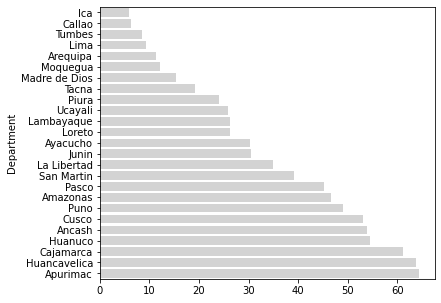

In [117]:
plt.figure(figsize=(6,5))

sns.barplot(y = "dpto", x = "child_work", data = tabla1,color = 'lightgray', ci = None,
                order=tabla1.sort_values('child_work').dpto)


plt.xlabel('')
plt.ylabel('Department')

## <a id='2.4'> 2.4 Append  </a>

In [118]:
append_enaho = sumaria_18.append(sumaria_19, ignore_index = True).append(sumaria_20, ignore_index = True)
append_enaho

,año,conglome,vivienda,hogar,ubigeo,estrato,mieperho,inghog1d,gashog2d,linpe,linea,pobreza,factor07
0,2018,005002,034,11,010101,4,4,47895.789062,31017.562500,167.150223,295.390869,3,132.652374
1,2018,005002,083,11,010101,4,4,39355.562500,12912.113281,167.150223,295.390869,2,132.652374
2,2018,005009,012,11,010101,4,2,41069.828125,38755.160156,167.150223,295.390869,3,80.340324
3,2018,005009,041,11,010101,4,2,27165.802734,30619.066406,167.150223,295.390869,3,80.340324
4,2018,005009,056,11,010101,4,4,33041.894531,18696.552734,167.150223,295.390869,3,80.340324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106512,2020,020305,031,11,250301,4,1,14227.951172,12997.472656,189.646835,335.352234,3,275.828552
106513,2020,020305,052,11,250301,4,1,11442.000000,10690.595703,189.646835,335.352234,3,275.828552
106514,2020,020305,073,11,250301,4,1,12847.000000,11576.803711,189.646835,335.352234,3,275.828552
106515,2020,020305,116,11,250301,4,4,21009.353516,23779.029297,189.646835,335.352234,3,275.828552


In [119]:
append_enaho['dpto'] =append_enaho.ubigeo.str[0:2].astype(int)
append_enaho['año'] = append_enaho['año'].astype(int)

In [120]:
# Asignamos el código de Lima metropolitana al Callao

append_enaho.loc[append_enaho.dpto == 7, "dpto"] = 15

In [121]:
append_enaho['dpto'].value_counts()

15    16506
4      5572
20     4996
2      4818
13     4726
12     4668
11     4644
16     4431
6      4364
14     4335
21     4193
23     4048
22     3969
8      3857
10     3842
1      3676
5      3578
25     3497
9      3118
19     3070
18     2957
3      2863
24     2550
17     2239
Name: dpto, dtype: int64

In [122]:
append_enaho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106517 entries, 0 to 106516
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   año       106517 non-null  int32  
 1   conglome  106517 non-null  object 
 2   vivienda  106517 non-null  object 
 3   hogar     106517 non-null  object 
 4   ubigeo    106517 non-null  object 
 5   estrato   106517 non-null  int8   
 6   mieperho  106517 non-null  int8   
 7   inghog1d  106517 non-null  float64
 8   gashog2d  106517 non-null  float64
 9   linpe     106517 non-null  float32
 10  linea     106517 non-null  float32
 11  pobreza   106517 non-null  int8   
 12  factor07  106517 non-null  float32
 13  dpto      106517 non-null  int32  
dtypes: float32(3), float64(2), int32(2), int8(3), object(4)
memory usage: 7.2+ MB


In [123]:
base_deflactores['dpto'] = base_deflactores['dpto'].astype(int)
base_deflactores['aniorec'] = base_deflactores['aniorec'].astype(int)
base_deflactores

,dpto,i00,i01,i02,i03,i04,i05,i06,i07,i08,aniorec
0,1,0.607886,0.530247,0.825380,0.588432,0.681404,0.552812,0.826531,0.803647,0.741648,2001
1,2,0.565700,0.509936,0.725376,0.443187,0.707493,0.638795,0.732794,0.705312,0.726457,2001
2,3,0.636805,0.574950,0.795341,0.646439,0.693671,0.708423,0.746142,0.719313,0.782393,2001
3,4,0.532813,0.487081,0.823422,0.498392,0.532523,0.782752,0.546386,0.563891,0.709164,2001
4,5,0.571589,0.544547,0.707839,0.489902,0.680501,0.637978,0.595529,0.615092,0.693569,2001
...,...,...,...,...,...,...,...,...,...,...,...
475,21,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020
476,22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020
477,23,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020
478,24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020


In [124]:
append_enaho = pd.merge(append_enaho, base_deflactores, how = "left", left_on = ['dpto','año'],
                       right_on = ['dpto','aniorec'], validate = "m:1")

In [125]:
append_enaho

,año,conglome,vivienda,hogar,ubigeo,estrato,mieperho,inghog1d,gashog2d,linpe,...,i00,i01,i02,i03,i04,i05,i06,i07,i08,aniorec
0,2018,005002,034,11,010101,4,4,47895.789062,31017.562500,167.150223,...,0.966355,0.944449,1.004394,0.945242,0.979517,0.971522,1.036047,1.005949,0.98071,2018
1,2018,005002,083,11,010101,4,4,39355.562500,12912.113281,167.150223,...,0.966355,0.944449,1.004394,0.945242,0.979517,0.971522,1.036047,1.005949,0.98071,2018
2,2018,005009,012,11,010101,4,2,41069.828125,38755.160156,167.150223,...,0.966355,0.944449,1.004394,0.945242,0.979517,0.971522,1.036047,1.005949,0.98071,2018
3,2018,005009,041,11,010101,4,2,27165.802734,30619.066406,167.150223,...,0.966355,0.944449,1.004394,0.945242,0.979517,0.971522,1.036047,1.005949,0.98071,2018
4,2018,005009,056,11,010101,4,4,33041.894531,18696.552734,167.150223,...,0.966355,0.944449,1.004394,0.945242,0.979517,0.971522,1.036047,1.005949,0.98071,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106512,2020,020305,031,11,250301,4,1,14227.951172,12997.472656,189.646835,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2020
106513,2020,020305,052,11,250301,4,1,11442.000000,10690.595703,189.646835,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2020
106514,2020,020305,073,11,250301,4,1,12847.000000,11576.803711,189.646835,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2020
106515,2020,020305,116,11,250301,4,4,21009.353516,23779.029297,189.646835,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2020


In [126]:
# Creación de la variable area, asi como del ingreso mensual percapita

append_enaho['area'] = append_enaho['estrato'].map(lambda x: 1 if x <= 5 else 2)

In [127]:
append_enaho['ingmpc'] = append_enaho.inghog1d/(append_enaho.mieperho*12*append_enaho.i00)

In [128]:
# data_ing = append_enaho.groupby(['año', 'area'], as_index = False)['ingmpc'].mean()  # ignora missing values # sum, min, max
# data_ing

Text(0.5, 1.0, 'Average monthly income percapita by area')

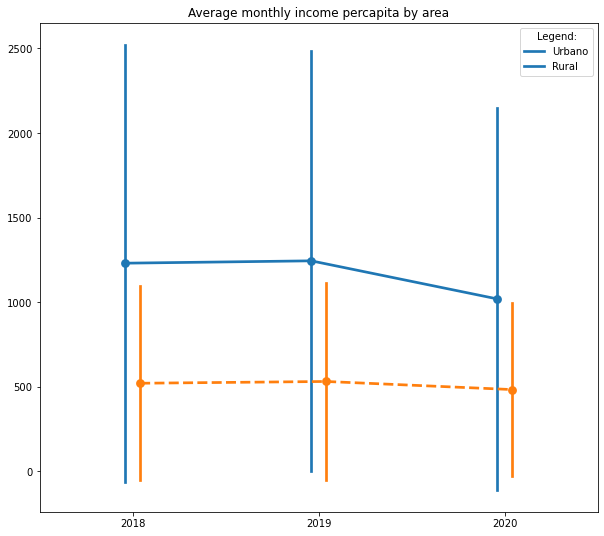

In [129]:
# Plot ploints

fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "año", y = "ingmpc", 
               data = append_enaho, ci = 'sd',  hue = 'area',
             dodge = 0.08, linestyles = [ "-", "--" ] )

# x,y label
plt.xlabel( "" )
plt.ylabel( "" )

# Change legend title
plt.legend(labels = ["Urbano","Rural"] ,title =  "Legend:" )
plt.title( 'Average monthly income percapita by area' )


# urbano (1), rural (2)

## <a id='3.0'> 3.0 ENDES  </a>

In [130]:
# Modulos a nivel hogar

rech0 = pd.read_stata("../../data/endes/RECH0.dta",convert_categoricals=False)
rech0.columns = rech0.columns.str.lower() # nombres a minuscula
rech0

,id1,hhid,hv001,hv002,hv002a,hv023,hv024,hv025,hv022,hv005,longitudx,latitudy
0,2020,000101101,1,11,1,1,1,1,3,651153,-77.873830,-6.223320
1,2020,000101501,1,15,1,1,1,1,3,651153,-77.873830,-6.223320
2,2020,000102401,1,24,1,1,1,1,3,154159,-77.873830,-6.223320
3,2020,000105001,1,50,1,1,1,1,3,651153,-77.873830,-6.223320
4,2020,000107601,1,76,1,1,1,1,3,651153,-77.873830,-6.223320
...,...,...,...,...,...,...,...,...,...,...,...,...
38078,2020,406704501,4067,45,1,25,25,2,249,453190,-74.978113,-8.661235
38079,2020,406707901,4067,79,1,25,25,2,249,453190,-74.994482,-8.699637
38080,2020,406708301,4067,83,1,25,25,2,249,453190,-74.994482,-8.699637
38081,2020,406708501,4067,85,1,25,25,2,249,453190,-74.994482,-8.699637


In [131]:
rech23 = pd.read_stata("../../data/endes/RECH23.dta",convert_categoricals=False)
rech23.columns = rech23.columns.str.lower() # nombres a minuscula
rech23['hhid'] = rech23.hhid.str.strip()
rech23

,hhid,hv202,hv205,hv206,shregion,shprovin,shdistri,hv270
0,000101101,NaN,12.0,1.0,3,1,1,2.0
1,000101501,NaN,11.0,1.0,3,1,1,2.0
2,000102401,NaN,11.0,1.0,3,1,1,4.0
3,000105001,NaN,11.0,1.0,3,1,1,4.0
4,000107601,NaN,11.0,1.0,3,1,1,2.0
...,...,...,...,...,...,...,...,...
38078,406704501,NaN,23.0,1.0,4,3,4,1.0
38079,406707901,NaN,32.0,1.0,4,3,4,1.0
38080,406708301,NaN,23.0,1.0,4,3,4,1.0
38081,406708501,NaN,23.0,1.0,4,3,4,2.0


In [132]:
rech0['hhid'] = rech0.hhid.str.strip() # retiramos los espacios vacios

In [133]:
# Modulo a nivel individuo

rech1 = pd.read_stata("../../data/endes/RECH1.dta",convert_categoricals=False)
rech1.columns = rech1.columns.str.lower() # nombres a minuscula
rech1['hhid'] = rech1.hhid.str.strip()
rech1

,hhid,hvidx,hv101,hv103,hv104,hv105,hv106,hv107,hv108,hv109,hv115
0,000101101,1,1,1,1,30,2,5.0,11,4,2.0
1,000101501,1,1,1,1,26,3,3.0,14,5,2.0
2,000101501,2,2,1,2,25,3,1.0,12,5,2.0
3,000101501,3,3,1,1,5,0,NaN,0,0,NaN
4,000102401,1,1,1,1,52,3,2.0,18,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...
139648,406710101,1,1,1,1,65,0,NaN,0,0,2.0
139649,406710101,2,2,1,2,58,0,NaN,0,0,2.0
139650,406710101,3,3,1,1,26,1,6.0,6,2,0.0
139651,406710101,4,3,1,2,42,2,2.0,8,3,0.0


In [134]:
# Modulo salud menores de edad

rech6 = pd.read_stata("../../data/endes/RECH6.dta",convert_categoricals=False)
rech6.columns = rech6.columns.str.lower() # nombres a minuscula
rech6['hhid'] = rech6.hhid.str.strip()
rech6

,hhid,hc0,hc57,hc70,hc71,hc72,hc73,hv005a
0,000303001,5,NaN,NaN,NaN,NaN,NaN,185735.533616
1,000303001,6,NaN,NaN,NaN,NaN,NaN,185735.533616
2,000312401,3,4.0,-62.0,1.0,52.0,57.0,244116.139818
3,000322101,3,4.0,-98.0,-19.0,63.0,67.0,284569.438926
4,000323501,3,3.0,62.0,165.0,176.0,169.0,185735.533616
...,...,...,...,...,...,...,...,...
13524,406608101,7,3.0,-56.0,-74.0,-64.0,-56.0,296148.323381
13525,406609101,7,3.0,-88.0,45.0,142.0,150.0,274505.655441
13526,406609201,3,4.0,-73.0,-45.0,-14.0,-4.0,429952.084992
13527,406609301,4,4.0,-36.0,110.0,170.0,180.0,325605.585484


In [135]:
# Modulo de salud mental

salud = pd.read_stata("../../data/endes/CSALUD01.dta",convert_categoricals=False)
salud.columns = salud.columns.str.lower() # nombres a minuscula
salud['hhid'] = salud.hhid.str.strip()
salud

,qhcluster,qhnumber,qhhome,hhid,qsnumero,qs700a,qs700b,qs700c,qs700d,qs700e,...,qs704a,qs704b,qs704c,qs704d,qs704e,qs704f,qs704g,qs704h,qs704i,peso15_amas
0,1,11,1,000101101,1,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224771.723969
1,1,15,1,000101501,1,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192856.102310
2,1,24,1,000102401,2,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364236.822210
3,1,50,1,000105001,1,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237849.098252
4,1,76,1,000107601,2,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318614.054834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,4067,45,1,406704501,1,2.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177004.130362
34399,4067,79,1,406707901,1,1.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177004.130362
34400,4067,83,1,406708301,1,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177004.130362
34401,4067,85,1,406708501,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# Módulo de violencia doméstica

dv = pd.read_stata("../../data/endes/REC84DV.dta",convert_categoricals=False)

dv['caseid'] = dv.caseid.str.strip()
dv.columns = dv.columns.str.lower() # nombres a minuscula
dv[['hhid', 'hvidx']] = dv.caseid.str.split(expand=True) #expand permite crear columnas para cada parte del split
dv['hvidx'] = dv['hvidx'].astype(int)
dv


,caseid,d103a,d103b,d103c,d105a,d105b,d105c,d105d,d105e,d105f,d105h,d105i,d105j,d105k,hhid,hvidx
0,000101501 2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,000101501,2
1,000102401 2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,000102401,2
2,000105001 2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,000105001,2
3,000107601 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000107601,2
4,000117001 2,0.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,000117001,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,406703401 1,2.0,2.0,NaN,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,406703401,1
27918,406703501 1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,406703501,1
27919,406703601 2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,406703601,2
27920,406708501 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406708501,5


## <a id='3.1'> 3.1 Dummies por nivel de anemia  </a>

In [137]:
endes_health_child = pd.merge(rech6, rech0 ,how = "left", on = "hhid", validate = "m:1").\
merge(rech23, how = "left", on = "hhid", validate = "m:1").\
merge(rech1, how = "left", left_on = ['hhid','hc0'], right_on = ['hhid','hvidx'], validate = "1:1")

In [138]:
endes_health_child

,hhid,hc0,hc57,hc70,hc71,hc72,hc73,hv005a,id1,hv001,...,hvidx,hv101,hv103,hv104,hv105,hv106,hv107,hv108,hv109,hv115
0,000303001,5,NaN,NaN,NaN,NaN,NaN,185735.533616,2020,3,...,5,3,1,1,0,0,NaN,0,0,NaN
1,000303001,6,NaN,NaN,NaN,NaN,NaN,185735.533616,2020,3,...,6,3,1,1,0,0,NaN,0,0,NaN
2,000312401,3,4.0,-62.0,1.0,52.0,57.0,244116.139818,2020,3,...,3,3,1,2,3,0,NaN,0,0,NaN
3,000322101,3,4.0,-98.0,-19.0,63.0,67.0,284569.438926,2020,3,...,3,3,1,1,4,0,NaN,0,0,NaN
4,000323501,3,3.0,62.0,165.0,176.0,169.0,185735.533616,2020,3,...,3,3,1,1,0,0,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13524,406608101,7,3.0,-56.0,-74.0,-64.0,-56.0,296148.323381,2020,4066,...,7,3,1,1,0,0,NaN,0,0,NaN
13525,406609101,7,3.0,-88.0,45.0,142.0,150.0,274505.655441,2020,4066,...,7,3,1,1,3,0,NaN,0,0,NaN
13526,406609201,3,4.0,-73.0,-45.0,-14.0,-4.0,429952.084992,2020,4066,...,3,3,1,2,2,0,NaN,0,0,NaN
13527,406609301,4,4.0,-36.0,110.0,170.0,180.0,325605.585484,2020,4066,...,4,3,1,2,1,0,NaN,0,0,NaN


In [139]:
# Creaciónd e dummies

endes_health_child.loc[ endes_health_child.hc57 == 1, "anemia_sev" ] = 1
endes_health_child.loc[ endes_health_child.hc57.isin([2,3,4]), "anemia_sev" ] = 0
endes_health_child.loc[ endes_health_child.hc57 == 9, "anemia_sev" ] = np.nan


endes_health_child.loc[ endes_health_child.hc57.isin([1,4]), "anemia_mildmod" ] = 0
endes_health_child.loc[ endes_health_child.hc57.isin([2,3]), "anemia_mildmod" ] = 1
endes_health_child.loc[ endes_health_child.hc57 == 9, "anemia_mildmod" ] = np.nan

In [140]:
endes_health_child[['anemia_sev', "anemia_mildmod"]]

,anemia_sev,anemia_mildmod
0,NaN,NaN
1,NaN,NaN
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
13524,0.0,1.0
13525,0.0,1.0
13526,0.0,0.0
13527,0.0,0.0


In [141]:
# Gráfico de barras de las desnutrición crónica a nivel departamento


dptos = ["Amazonas", "Ancash", "Apurimac", "Arequipa", "Ayacucho", "Cajamarca", "Callao", "Cusco",
        "Huancavelica", "Huanuco", "Ica", "Junin", "La Libertad", "Lambayaque", "Lima", "Loreto",
        "Madre de Dios", "Moquegua", "Pasco" , "Piura", "Puno", "San Martin", "Tacna" , "Tumbes", "Ucayali"]

code = [*range(1,26)]

# multiple Loop

for i, j in zip(code , dptos):
                
    endes_health_child.loc[endes_health_child.hv024 == i, "region"] = j

    
# replace 9 por missing

endes_health_child.loc[endes_health_child.hc70.isin([996,9998,9999]), "hc70"] = np.nan
endes_health_child['desncro'] = np.where( (endes_health_child.hc70<-300) & (endes_health_child.hv103 == 1), 1,
np.where( (endes_health_child.hc70>=-300) & (endes_health_child.hc70<601)  & (endes_health_child.hv103 == 1), 0 , np.nan) )

In [142]:
endes_health_child

,hhid,hc0,hc57,hc70,hc71,hc72,hc73,hv005a,id1,hv001,...,hv105,hv106,hv107,hv108,hv109,hv115,anemia_sev,anemia_mildmod,region,desncro
0,000303001,5,NaN,NaN,NaN,NaN,NaN,185735.533616,2020,3,...,0,0,NaN,0,0,NaN,NaN,NaN,Amazonas,NaN
1,000303001,6,NaN,NaN,NaN,NaN,NaN,185735.533616,2020,3,...,0,0,NaN,0,0,NaN,NaN,NaN,Amazonas,NaN
2,000312401,3,4.0,-62.0,1.0,52.0,57.0,244116.139818,2020,3,...,3,0,NaN,0,0,NaN,0.0,0.0,Amazonas,0.0
3,000322101,3,4.0,-98.0,-19.0,63.0,67.0,284569.438926,2020,3,...,4,0,NaN,0,0,NaN,0.0,0.0,Amazonas,0.0
4,000323501,3,3.0,62.0,165.0,176.0,169.0,185735.533616,2020,3,...,0,0,NaN,0,0,NaN,0.0,1.0,Amazonas,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13524,406608101,7,3.0,-56.0,-74.0,-64.0,-56.0,296148.323381,2020,4066,...,0,0,NaN,0,0,NaN,0.0,1.0,Ucayali,0.0
13525,406609101,7,3.0,-88.0,45.0,142.0,150.0,274505.655441,2020,4066,...,3,0,NaN,0,0,NaN,0.0,1.0,Ucayali,0.0
13526,406609201,3,4.0,-73.0,-45.0,-14.0,-4.0,429952.084992,2020,4066,...,2,0,NaN,0,0,NaN,0.0,0.0,Ucayali,0.0
13527,406609301,4,4.0,-36.0,110.0,170.0,180.0,325605.585484,2020,4066,...,1,0,NaN,0,0,NaN,0.0,0.0,Ucayali,0.0


Text(0, 0.5, 'Department')

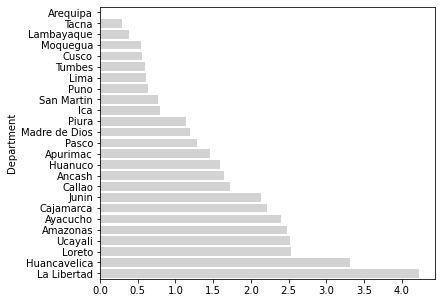

In [143]:
## Gráfico de barras horizontal 

tabla2 = pd.crosstab(endes_health_child.region , endes_health_child.desncro, normalize = "index").reset_index()

del tabla2[0.0]
tabla2.rename(columns = {1.0 : "dcro"}, inplace = True)

tabla2['dcro'] = tabla2.dcro*100

# figure

plt.figure(figsize=(6,5))

sns.barplot(y = "region", x = "dcro", data = tabla2 ,color = 'lightgray', ci = None,
                order=tabla2.sort_values('dcro').region)


plt.xlabel('')
plt.ylabel('Department')

## <a id='3.2'> 3.2 Salud mental </a>

In [144]:
# Este módulo es respondido por el jefe o jefa del hogar

endes_mental = pd.merge(salud, rech0, how = "left", on = "hhid", validate = "m:1").\
merge(rech23, how = "left", on = "hhid", validate = "m:1").\
merge(rech1, how = "left", left_on = ['hhid','qsnumero'], right_on = ['hhid','hvidx'], validate = "1:1")

endes_mental

,qhcluster,qhnumber,qhhome,hhid,qsnumero,qs700a,qs700b,qs700c,qs700d,qs700e,...,hvidx,hv101,hv103,hv104,hv105,hv106,hv107,hv108,hv109,hv115
0,1,11,1,000101101,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,30,2,5.0,11,4,2.0
1,1,15,1,000101501,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,26,3,3.0,14,5,2.0
2,1,24,1,000102401,2,0.0,0.0,0.0,0.0,0.0,...,2,2,1,2,36,3,3.0,14,5,1.0
3,1,50,1,000105001,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,65,2,5.0,11,4,2.0
4,1,76,1,000107601,2,0.0,1.0,0.0,0.0,0.0,...,2,3,1,2,16,2,1.0,7,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,4067,45,1,406704501,1,2.0,2.0,1.0,1.0,1.0,...,1,1,1,1,55,1,5.0,5,1,3.0
34399,4067,79,1,406707901,1,1.0,3.0,0.0,0.0,0.0,...,1,1,1,1,58,1,5.0,5,1,5.0
34400,4067,83,1,406708301,1,1.0,1.0,0.0,0.0,0.0,...,1,1,1,1,55,1,5.0,5,1,0.0
34401,4067,85,1,406708501,1,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,58,1,5.0,5,1,1.0


In [145]:
# replace 9 por misssing

col_repl  = ["qs700a", "qs700b", "qs700c", "qs700d","qs700e", "qs700f","qs700g", "qs700h","qs700i"]

for var in col_repl:
    endes_mental[var] = endes_mental[var].replace(9, np.nan)

In [146]:
# rename 

endes_mental.rename(columns = {"qs700a":"low_interest",
                                "qs700b":"depressed",
                                "qs700c":"not_sleep",
                                "qs700d":"tired",
                                "qs700e":"poor_appetite",
                                "qs700f":"pay_attention",
                                "qs700g":"difficult_move",
                                "qs700h":"suicide",
                                "qs700i":"feel_bad"}, inplace = True )


In [147]:
endes_mental

,qhcluster,qhnumber,qhhome,hhid,qsnumero,low_interest,depressed,not_sleep,tired,poor_appetite,...,hvidx,hv101,hv103,hv104,hv105,hv106,hv107,hv108,hv109,hv115
0,1,11,1,000101101,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,30,2,5.0,11,4,2.0
1,1,15,1,000101501,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,26,3,3.0,14,5,2.0
2,1,24,1,000102401,2,0.0,0.0,0.0,0.0,0.0,...,2,2,1,2,36,3,3.0,14,5,1.0
3,1,50,1,000105001,1,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,65,2,5.0,11,4,2.0
4,1,76,1,000107601,2,0.0,1.0,0.0,0.0,0.0,...,2,3,1,2,16,2,1.0,7,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,4067,45,1,406704501,1,2.0,2.0,1.0,1.0,1.0,...,1,1,1,1,55,1,5.0,5,1,3.0
34399,4067,79,1,406707901,1,1.0,3.0,0.0,0.0,0.0,...,1,1,1,1,58,1,5.0,5,1,5.0
34400,4067,83,1,406708301,1,1.0,1.0,0.0,0.0,0.0,...,1,1,1,1,55,1,5.0,5,1,0.0
34401,4067,85,1,406708501,1,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,58,1,5.0,5,1,1.0


In [148]:
# Suma horizontal
# Sumamo las 9 variables sobre sintomatología de la depresión

endes_mental['phq9_score'] = endes_mental.iloc[:,5:14].sum(axis = 1)

In [149]:
endes_mental['phq9_score'].isna().sum()

0

In [150]:
# Dummies segpún niveles de síntomas depresivos

# Leve

endes_mental['mild_depression'] = np.where( (endes_mental.phq9_score < 5 ) | ( endes_mental.phq9_score > 9 ), 0,
                    np.where( (endes_mental.phq9_score >= 5 ) | ( endes_mental.phq9_score <= 9 ), 1, np.nan))

# Moderado

endes_mental['moderate_depression'] = np.where( (endes_mental.phq9_score < 10 ) | ( endes_mental.phq9_score > 14 ), 0,
                    np.where( (endes_mental.phq9_score >= 10 ) | ( endes_mental.phq9_score <= 14 ), 1, np.nan))

# Severo

endes_mental['severe_depression'] = np.where( endes_mental.phq9_score < 15 , 0,
                    np.where( endes_mental.phq9_score >= 5 , 1, np.nan))

## <a id='3.3'> 3.3 Violencia doméstica </a>

In [151]:
labels_vd  = pd.read_stata("../../data/endes/REC84DV.dta",convert_categoricals=False, iterator=True)

In [152]:
print(labels_vd.variable_labels())  # etiqueta de cada variable

labels_vd.value_labels().keys()  # etiqueta de cada valor 

{'caseid': 'Identificación de caso', 'd103a': 'Su esposo/compañero alguna vez le ha dicho o le ha hecho cosas para humillarla ', 'd103b': 'Su esposo/compañero la ha amenazado con hacerle daño a usted o a alguien cerca', 'd103c': 'Su esposo/compañero siempre insulta o hace sentir mal', 'd105a': 'Su esposo/compañero alguna vez la empujó, sacudió o le tiró algo', 'd105b': 'Su esposo/compañero alguna vez la abofeteó o le retorció el brazo', 'd105c': 'Su esposo/compañero alguna vez la golpeó con el puño o con algo que pudo hace', 'd105d': 'Su esposo/compañero alguna vez la ha pateado o arrastrado', 'd105e': 'Su esposo/compañero alguna vez trató de estrangularla o quemarla', 'd105f': 'Su esposo/compañero alguna vez la amenazó con un cuchillo / pistola u otro tip', 'd105h': 'Su esposo/compañero alguna vez ha utilizado la fuerza física para obligarla a ', 'd105i': 'Su esposo/compañero alguna vez la obligó a realizar actos sexuales que Ud. no ', 'd105j': 'Su esposo/compañero alguna vez le retor

dict_keys(['labels27', 'labels26', 'labels25', 'labels24', 'labels22', 'labels21', 'labels20', 'labels19', 'labels18', 'labels17', 'labels12', 'labels11', 'labels10'])

In [153]:
labels_vd.value_labels()["labels27"]

{0: 'No', 1: 'Frecuentemente', 2: 'Algunas veces', 3: 'Nunca'}

In [154]:
dv_endes = pd.merge(dv, rech1, how = "left", on = ['hhid','hvidx'], validate = "1:1").\
merge(rech0, how = "left", on = 'hhid' , validate = "m:1").\
merge(rech23, how = "left", on = 'hhid' , validate = "m:1")

In [155]:
dv_endes

,caseid,d103a,d103b,d103c,d105a,d105b,d105c,d105d,d105e,d105f,...,hv005,longitudx,latitudy,hv202,hv205,hv206,shregion,shprovin,shdistri,hv270
0,000101501 2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,651153,-77.873830,-6.223320,NaN,11.0,1.0,3,1,1,2.0
1,000102401 2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,154159,-77.873830,-6.223320,NaN,11.0,1.0,3,1,1,4.0
2,000105001 2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,651153,-77.873830,-6.223320,NaN,11.0,1.0,3,1,1,4.0
3,000107601 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,651153,-77.873830,-6.223320,NaN,11.0,1.0,3,1,1,2.0
4,000117001 2,0.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,...,154159,-77.873830,-6.223320,NaN,11.0,1.0,3,1,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,406703401 1,2.0,2.0,NaN,2.0,2.0,2.0,2.0,0.0,0.0,...,280461,-74.978113,-8.661235,NaN,23.0,1.0,4,3,4,2.0
27918,406703501 1,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,280461,-74.978113,-8.661235,11.0,23.0,1.0,4,3,4,1.0
27919,406703601 2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,280461,-74.978113,-8.661235,11.0,23.0,1.0,4,3,4,2.0
27920,406708501 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,453190,-74.994482,-8.699637,NaN,23.0,1.0,4,3,4,2.0


In [156]:
# Violencia psicológica #

dv_endes['humiliated'] = np.where(dv_endes.d103a.isin([1,2]),1,
                                  np.where(dv_endes.d103a.isin([0,3]),0,np.nan)
                                 )

dv_endes['threatened'] = np.where(dv_endes.d103b.isin([1,2]),1,
                                  np.where(dv_endes.d103b.isin([0,3]),0,np.nan)
                                 )

dv_endes['psycho'] = np.where( (dv_endes.humiliated == 1) | (dv_endes.threatened==1),1,
                np.where((dv_endes.humiliated == 0) & (dv_endes.threatened==0), 0 , np.nan)
                                 )


In [157]:
dv_endes['psycho'].value_counts()

0.0    17603
1.0     1687
Name: psycho, dtype: int64